**Importing important libraries and function** 

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.layers.normalization import BatchNormalization
from keras.initializers import RandomNormal

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

Using TensorFlow backend.


* **Load the data and Normalazie it**
* **Define the batch size and epochs**

In [2]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Number of training examples :", X_train.shape[0], 
      "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], 
      "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

#pixcels values are from 0-255, so divide each pixel by 255 (to noramalize)
X_train, X_test = X_train/255, X_test/255

#converting labels into one-hot encoded: there are 10 labels so new vector will be 10 dimensional
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
print("Class label of first image :", y_train[0])
print("After converting the output into a vector : ",Y_train[0])

batch_size = 128 #2^7
epochs = 20
num_class = 10

11493376/11490434 [==============================] - 2s 0us/step
Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)
Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


* Each input of train and test data in 3-dimension but Conv2D will need 4dimension input. So adding one more dimension in train and test data.

In [3]:
print('Shape of X_train is: ', X_train.shape, 'So each input will have {} dimensions'.format(len(X_train.shape)))
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print('After adding one more dimension shape of train data is: ', X_train.shape, 'each input has {} dimensions'.format(len(X_train.shape)))

Shape of X_train is:  (60000, 28, 28) So each input will have 3 dimensions
After adding one more dimension shape of train data is:  (60000, 28, 28, 1) each input has 4 dimensions


**NOTE:** 
* I'll keep my optimizer as **Adam**.
* I'll choose two different types of kerenl (3x3), (5x5) and (7,7) for ConvNet and (2,2), (3,3) and (5,5) for max pool.



# With 3-CovNet Layers

**References**
* https://keras.io/layers/convolutional/
* https://keras.io/initializers/
* https://keras.io/layers/pooling/
* https://keras.io/optimizers/
* https://keras.io/layers/pooling/

In [0]:
#  http://zetcode.com/python/prettytable/           
x = PrettyTable()
x.field_names = ["Architecture", "Optimizer", "Test Loss", "Test Accuracy"]

***input --> ConvNet(3,3)16 --> relu --> ConveNet(3,3)32 --> relu --> batch normalization+dropout(0.5) --> ConvNet(3,3)64 --> MaxPooling[(3,3),s=3] --> flatten --> 1FC layer(512) --> softmax(10)***

In [5]:
model = Sequential()
#first ConvNet Layer
model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', padding = 'same', 
                 input_shape = (X_train.shape[1], X_train.shape[2],1),
                 kernel_initializer = 'he_normal', data_format = 'channels_last'))

#second ConvNet Layer
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same',
                kernel_initializer = 'he_normal'))
#adding BatchNomralization layer
model.add(BatchNormalization())
# adding dropout
model.add(Dropout(0.3))

#third ConvNet Layer
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same',
                kernel_initializer = 'he_normal'))

# adding MaxPooling
model.add(MaxPooling2D(pool_size = (3,3), padding = 'same', strides = 3)) #by deafult strides pool_size

#flatten
model.add(Flatten())

# fully connected layer: layer-4
model.add(Dense(512, activation = 'relu', kernel_initializer = 'he_normal'))

#output layer
model.add(Dense(num_class, activation = 'softmax', kernel_initializer = 'he_normal'))

model.summary()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0        

In [6]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test),epochs = epochs, batch_size = batch_size, verbose = 1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 297us/step - loss: 11.5355 - acc: 0.2768 - val_loss: 11.4821 - val_acc: 0.2856
Epoch 2/20
60000/60000 [==============================] - 14s 238us/step - loss: 11.4719 - acc: 0.2864 - val_loss: 11.4524 - val_acc: 0.2881
Epoch 3/20
60000/60000 [==============================] - 14s 240us/step - loss: 10.4619 - acc: 0.3360 - val_loss: 0.1850 - val_acc: 0.9519
Epoch 4/20
60000/60000 [==============================] - 15s 242us/step - loss: 0.0777 - acc: 0.9757 - val_loss: 0.0506 - val_acc: 0.9842
Epoch 5/20
60000/60000 [==============================] - 15s 242us/step - loss: 0.0402 - acc: 0.9875 - val_loss: 0.0370 - val_acc: 0.9879
Epoch 6/20
60000/60000 [==============================] - 15s 242us/step - loss: 0.0279 - acc: 0.9910 - val_loss: 0.0411 - val_acc: 0.9880
Epoch 7/20
60000

Test loss:  0.038831931958390443
Test accuracy:  0.9901


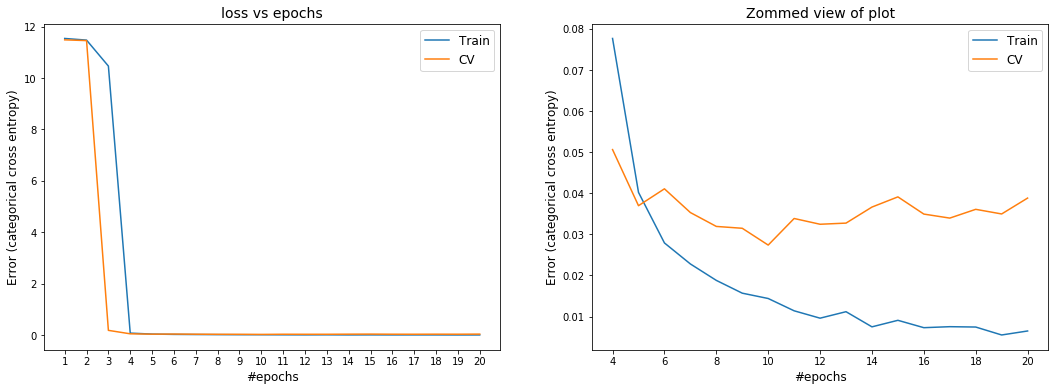

In [7]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

train_loss = history.history['loss']
cv_loss    = history.history['val_loss']
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (18, 6))
ax1.plot(range(1, epochs+1), train_loss, label = 'Train')
ax1.plot(range(1, epochs+1), cv_loss, label = 'CV')
ax1.set_xticks(range(1,21))
ax1.legend(fontsize = 12)
ax1.set_xlabel('#epochs', fontsize = 12)
ax1.set_ylabel('Error (categorical cross entropy)', fontsize = 12)
ax1.set_title('loss vs epochs', fontsize = 14)

ax2.set_title('Zommed view of plot', fontsize = 14)
ax2.plot(range(4, epochs+1), train_loss[3:], label = 'Train')
ax2.plot(range(4, epochs+1), cv_loss[3:], label = 'CV')
ax2.legend(fontsize = 12)
ax2.set_xlabel('#epochs', fontsize = 12)
ax2.set_ylabel('Error (categorical cross entropy)', fontsize = 12)
plt.show()

# With 5-Convenet Layer

***input --> 1<sup>st</sup> ConvNet(5,5)16 --> relu --> Batch Normalization + dropout --> 2<sup>nd</sup> ConvNet(5,5)24 --> relu --> Batch Normalization + dropout --> MaxPooling[(2,2),s=2] --> 3 <sup>rd</sup> ConvNet(5,5)40 --> relu --> Batch Normalization + dropout --> 4 <sup>th</sup> ConvNet(5,5)64 --> relu --> Batch Normalization + dropout --> MaxPooling[(2,2), s=2] --> 5 <sup>th</sup> ConveNet(5,5)80 --> relu --> Batch Normalization + dropout --> flatten --> F.C.(720, 'relu' activation) --> softmax(10)***

In [8]:
model2 = Sequential()
#first ConvNet layer
model2.add(Conv2D(16, kernel_size = (5,5), activation = 'relu', padding = 'same', 
                 input_shape = (X_train.shape[1], X_train.shape[2],1),
                 kernel_initializer = 'he_normal', data_format = 'channels_last'))
#adding batch normalization
model2.add(BatchNormalization())
#adding dropout
model2.add(Dropout(0.4))


#second ConvNet layer
model2.add(Conv2D(24, kernel_size = (5,5), activation = 'relu', padding = 'same',
                 kernel_initializer = 'he_normal'))
#adding batch normalization
model2.add(BatchNormalization())
#adding dropout
model2.add(Dropout(0.4))
#adding MaxPooling
model2.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'same'))


#third ConvNet layer
model2.add(Conv2D(40, kernel_size = (5,5), activation = 'relu', padding = 'same',
                kernel_initializer = 'he_normal'))
#adding batch normalization
model2.add(BatchNormalization())
#adding dropout
model2.add(Dropout(0.4))


#fourth ConvNet layer
model2.add(Conv2D(64, kernel_size = (5,5), activation = 'relu', padding = 'same',
                kernel_initializer = 'he_normal'))
#adding batch normalization
model2.add(BatchNormalization())
#adding dropout
model2.add(Dropout(0.4))
#adding MaxPooling
model2.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'same'))

#fifth ConvNet layer
model2.add(Conv2D(80, kernel_size = (5,5), activation = 'relu', padding = 'same',
                kernel_initializer = 'he_normal'))
#adding batch normalization
model2.add(BatchNormalization())
#adding dropout
model2.add(Dropout(0.4))
#flatted the ConvNet output
model2.add(Flatten())

#add dense layer with relu activations
model2.add(Dense(720, activation = 'relu', kernel_initializer = 'he_normal'))

#add softmax unit
model2.add(Dense(num_class, activation = 'softmax', kernel_initializer = 'he_normal'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 24)        9624      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 24)        96        
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 24)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 24)       

In [9]:
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history2 = model2.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 367us/step - loss: 0.2582 - acc: 0.9252 - val_loss: 0.0896 - val_acc: 0.9696
Epoch 2/20
60000/60000 [==============================] - 20s 337us/step - loss: 0.0785 - acc: 0.9760 - val_loss: 0.0657 - val_acc: 0.9789
Epoch 3/20
60000/60000 [==============================] - 20s 337us/step - loss: 0.0596 - acc: 0.9819 - val_loss: 0.0473 - val_acc: 0.9851
Epoch 4/20
60000/60000 [==============================] - 20s 339us/step - loss: 0.0466 - acc: 0.9866 - val_loss: 0.0300 - val_acc: 0.9902
Epoch 5/20
60000/60000 [==============================] - 20s 337us/step - loss: 0.0406 - acc: 0.9872 - val_loss: 0.0289 - val_acc: 0.9903
Epoch 6/20
60000/60000 [==============================] - 20s 337us/step - loss: 0.0381 - acc: 0.9882 - val_loss: 0.0293 - val_acc: 0.9903
Epoch 7/20
60000/60000 [==============================] - 20s 337us/step - loss: 0.0346 - acc: 0.9893 - val_loss: 0.

Test loss:  0.024633801211849958
Test accuracy:  0.9932


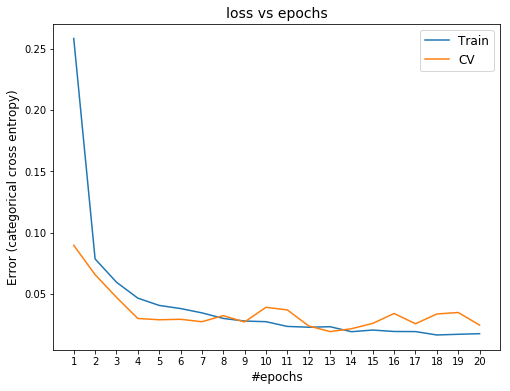

In [10]:
score = model2.evaluate(X_test, Y_test, verbose = 0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

train_loss = history2.history['loss']
cv_loss    = history2.history['val_loss']

plt.figure(figsize = (8, 6))
plt.plot(range(1, epochs+1), train_loss, label = 'Train')
plt.plot(range(1, epochs+1), cv_loss, label = 'CV')
plt.xticks(range(1,21))
plt.legend(fontsize = 12)
plt.xlabel('#epochs', fontsize = 12)
plt.ylabel('Error (categorical cross entropy)', fontsize = 12)
plt.title('loss vs epochs', fontsize = 14)
plt.show()

# With 7-ConvNet Layer

***input --> 1<sup>st</sup> ConvNet(7,7)24 --> relu --> Batch Nomralization+dropout --> 2<sup>nd</sup> ConvNet(7,7)50 --> relu --> Batch Nomralization+dropout --> 3<sup>rd</sup> ConvNet(7,7)70 --> relu --> Batch Nomralization+dropout --> MaxPool[(5,5),s=5] --> 4<sup>th</sup> ConvNet(7,7)90 --> relu --> Batch Nomralization+dropout --> 5<sup>th</sup> ConvNet(7,7)100 --> relu --> Batch Nomralization+dropout --> 6<sup>th</sup> ConvNet(7,7)110 --> relu --> Batch Nomralization+dropout --> MaxPool[(5,5),s=5] --> 7<sup>th</sup> ConvNet(7,7)130 --> Batch Nomralization+dropout --> flatten --> F.C.(260) --> softmax(10)***

In [11]:
model3 = Sequential()
#first ConvNet layer
model3.add(Conv2D(24, kernel_size = (7,7), activation = 'relu', padding = 'same', 
                 input_shape = (X_train.shape[1], X_train.shape[2],1),
                 kernel_initializer = 'he_normal', data_format = 'channels_last'))
#adding batch normalization
model3.add(BatchNormalization())
#adding dropout
model3.add(Dropout(0.5))


#second ConvNet layer
model3.add(Conv2D(50, kernel_size = (7,7), activation = 'relu', padding = 'same',
                 kernel_initializer = 'he_normal'))
#adding batch normalization
model3.add(BatchNormalization())
#adding dropout
model3.add(Dropout(0.5))


#third ConvNet layer
model3.add(Conv2D(70, kernel_size = (7,7), activation = 'relu', padding = 'same',
                kernel_initializer = 'he_normal'))
#adding batch normalization
model3.add(BatchNormalization())
#adding dropout
model3.add(Dropout(0.5))
#adding MaxPooling
model3.add(MaxPooling2D(pool_size = (5,5), strides = 5, padding = 'same'))


#fourth ConvNet layer
model3.add(Conv2D(90, kernel_size = (7,7), activation = 'relu', padding = 'same',
                kernel_initializer = 'he_normal'))
#adding batch normalization
model3.add(BatchNormalization())
#adding dropout
model3.add(Dropout(0.5))


#fifth ConvNet layer
model3.add(Conv2D(100, kernel_size = (7,7), activation = 'relu', padding = 'same',
                kernel_initializer = 'he_normal'))
#adding batch normalization
model3.add(BatchNormalization())
#adding dropout
model3.add(Dropout(0.5))


#sixth ConvNet layer
model3.add(Conv2D(110, kernel_size = (7,7), activation = 'relu', padding = 'same',
                kernel_initializer = 'he_normal'))
#adding batch normalization
model3.add(BatchNormalization())
#adding dropout
model3.add(Dropout(0.5))
#adding MaxPooling
model3.add(MaxPooling2D(pool_size = (5,5), strides = 5, padding = 'same'))


#seventh ConvNet layer
model3.add(Conv2D(130, kernel_size = (7,7), activation = 'relu', padding = 'same',
                kernel_initializer = 'he_normal'))
#adding batch normalization
model3.add(BatchNormalization())
#adding dropout
model3.add(Dropout(0.5))

#flatted the ConvNet output
model3.add(Flatten())


#add dense layer with relu activations
model3.add(Dense(260, activation = 'relu', kernel_initializer = 'he_normal'))

#add softmax unit
model3.add(Dense(num_class, activation = 'softmax', kernel_initializer = 'he_normal'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 24)        1200      
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 24)        96        
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 28, 24)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 50)        58850     
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
dropout_8 (Dropout)          (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 70)       

In [12]:
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history3 = model3.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 62s 1ms/step - loss: 0.6965 - acc: 0.7593 - val_loss: 3.4048 - val_acc: 0.3093
Epoch 2/20
60000/60000 [==============================] - 59s 979us/step - loss: 0.1219 - acc: 0.9632 - val_loss: 1.4657 - val_acc: 0.6246
Epoch 3/20
60000/60000 [==============================] - 59s 977us/step - loss: 0.0854 - acc: 0.9741 - val_loss: 0.8107 - val_acc: 0.7641
Epoch 4/20
60000/60000 [==============================] - 59s 978us/step - loss: 0.0681 - acc: 0.9802 - val_loss: 0.4741 - val_acc: 0.8605
Epoch 5/20
60000/60000 [==============================] - 59s 976us/step - loss: 0.0594 - acc: 0.9822 - val_loss: 0.3884 - val_acc: 0.8820
Epoch 6/20
60000/60000 [==============================] - 59s 976us/step - loss: 0.0527 - acc: 0.9844 - val_loss: 0.5125 - val_acc: 0.8463
Epoch 7/20
60000/60000 [==============================] - 59s 987us/step - loss: 0.0464 - acc: 0.9861 - val_loss: 0.36

Test loss:  0.06324766013510526
Test accuracy:  0.9813


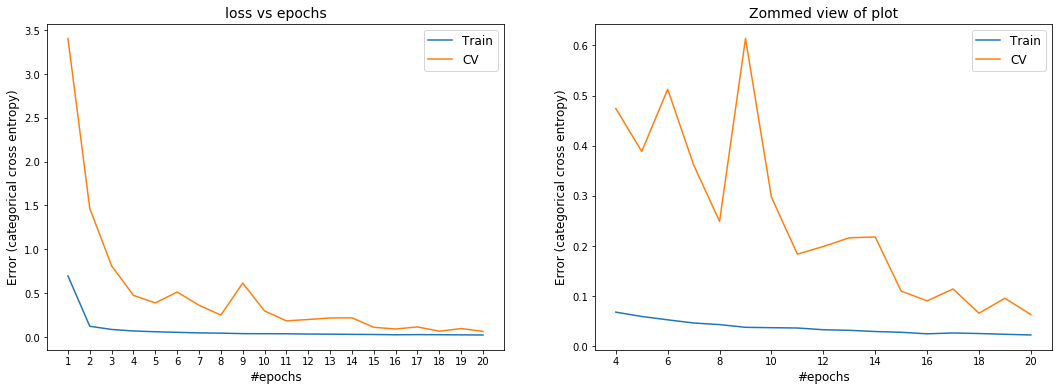

In [13]:
score = model3.evaluate(X_test, Y_test, verbose = 0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

train_loss = history3.history['loss']
cv_loss    = history3.history['val_loss']

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (18, 6))
ax1.plot(range(1, epochs+1), train_loss, label = 'Train')
ax1.plot(range(1, epochs+1), cv_loss, label = 'CV')
ax1.set_xticks(range(1,21))
ax1.legend(fontsize = 12)
ax1.set_xlabel('#epochs', fontsize = 12)
ax1.set_ylabel('Error (categorical cross entropy)', fontsize = 12)
ax1.set_title('loss vs epochs', fontsize = 14)

ax2.set_title('Zommed view of plot', fontsize = 14)
ax2.plot(range(4, epochs+1), train_loss[3:], label = 'Train')
ax2.plot(range(4, epochs+1), cv_loss[3:], label = 'CV')
ax2.legend(fontsize = 12)
ax2.set_xlabel('#epochs', fontsize = 12)
ax2.set_ylabel('Error (categorical cross entropy)', fontsize = 12)
plt.show()

# Conclusion

* With 3-ConvNet layer followed has test loss = 0.0388,  and test accuracy = 0.9901.
* With 5-ConvNet layer followed has test loss = 0.0246, and test accuracy = 0.9932.
* With 7-ConvNet layer followed has test loss = 0.0632, and test accuracy = 0.9813.

Out of these three models 2<sup>nd</sup> model has best performance and even CNN with 3-ConvNet layer is giving much better performance than MLPs. But 3<sup>rd</sup> model which has 7-ConvNet layers (which is deep network) is not giving goog performance as compared to other two models. The reason behind this can be small dataset for training. Deep architecture with small dataset tend to overfit in training on data. It can be avoided by collecting more data (if possible) or we can go for data augmentation.